Machine Learning Project

Project Name: Prediction for Credit Card Approval

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
# Load the training dataset
train_data = pd.read_csv('train_data.csv')

In [96]:
train_data.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With parents -16271              -3111                   1   
1  House / apartment -10130              -1651                   1   
2  House / apartment -12821              -5657                   1   
3  House / apartment -20929              -2046                   1   
4  House / apartment -16207               -515                   1   

   Has a work phone  Has a phone  Has an email    Job title  \
0                 0            0             0   Core staff   
1                 0            0             0  Accountants   
2                 0            0             0     Laborers   
3                 0            0             1     Managers   
4                 0            1             0          NaN   

   Family member count  Account age  Is high risk  
0                  2.0        -17.0             0  
1                  2.0         -1.0             0  
2                  4.0        -38.0             0  
3                  1.0        -11.0             0  
4                  1.0        -41.0             0

In [144]:
# Display basic information about the training dataset
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         29165 non-null  int64   
 1   Gender                     29165 non-null  object  
 2   Has a car                  29165 non-null  object  
 3   Has a property             29165 non-null  object  
 4   Children count             29165 non-null  int64   
 5   Income                     29165 non-null  float64 
 6   Employment status          29165 non-null  object  
 7   Education level            29165 non-null  object  
 8   Marital status             29165 non-null  object  
 9   Dwelling                   29165 non-null  object  
 10  Age                        29165 non-null  int64   
 11  Employment length          29165 non-null  int64   
 12  Has a mobile phone         29165 non-null  int64   
 13  Has a work phone           2916

In [147]:
train_data.isnull().sum()


ID                               0
Gender                           0
Has a car                        0
Has a property                   0
Children count                   0
Income                           0
Employment status                0
Education level                  0
Marital status                   0
Dwelling                         0
Age                              0
Employment length                0
Has a mobile phone               0
Has a work phone                 0
Has a phone                      0
Has an email                     0
Job title                        0
Family member count              0
Account age                      0
Is high risk                     0
Age_Group                    29165
Income_Family                    0
Gender_Encoded                   0
Has a car_Encoded                0
Has a property_Encoded           0
Employment status_Encoded        0
Education level_Encoded          0
Marital status_Encoded           0
Dwelling_Encoded    

# 1. Summary Statistics

In [99]:
train_data.describe()

ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000   
25%         -3153.000000                 1.0          0.000000      0.000000   
50%         -1557.000000                 1.0          0.000000      0.000000   
75%          -412.000000                 1.0          0.000000      1.000000   
max        365243.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  29165.000000         29165.000000  29165.000000  29165.000000  
mean       0.090279             2.197531    -26.137734      0.017110  
std        0.286587             0.912189     16.486702      0.129682  
min        0.000000             1.000000    -60.000000      0.000000  
25%        0.000000             2.000000    -39.000000      0.000000  
50%        0.000000             2.000000    -24.000000      0.000000  
75%        0.000000             3.000000    -12.000000      0.000000  
max        1.000000            20.000000      0.000000      1.000000

# 2. Data Visualization

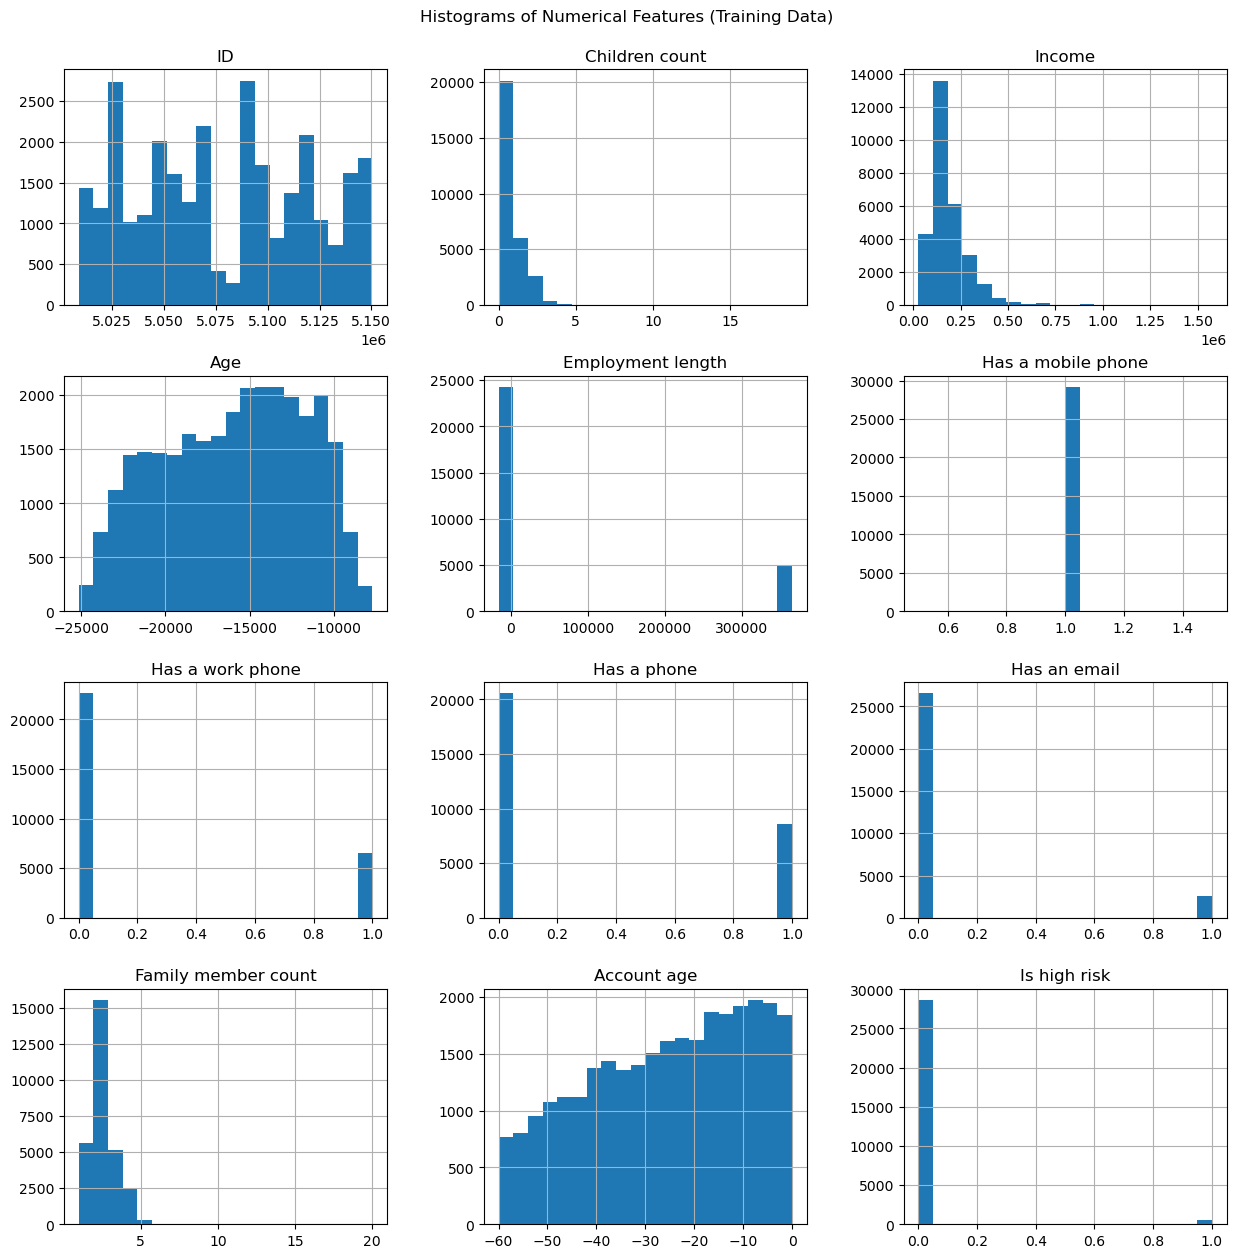

In [100]:

# Histograms for numerical features in the training dataset
train_data.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Features (Training Data)', y=0.92)
plt.show()

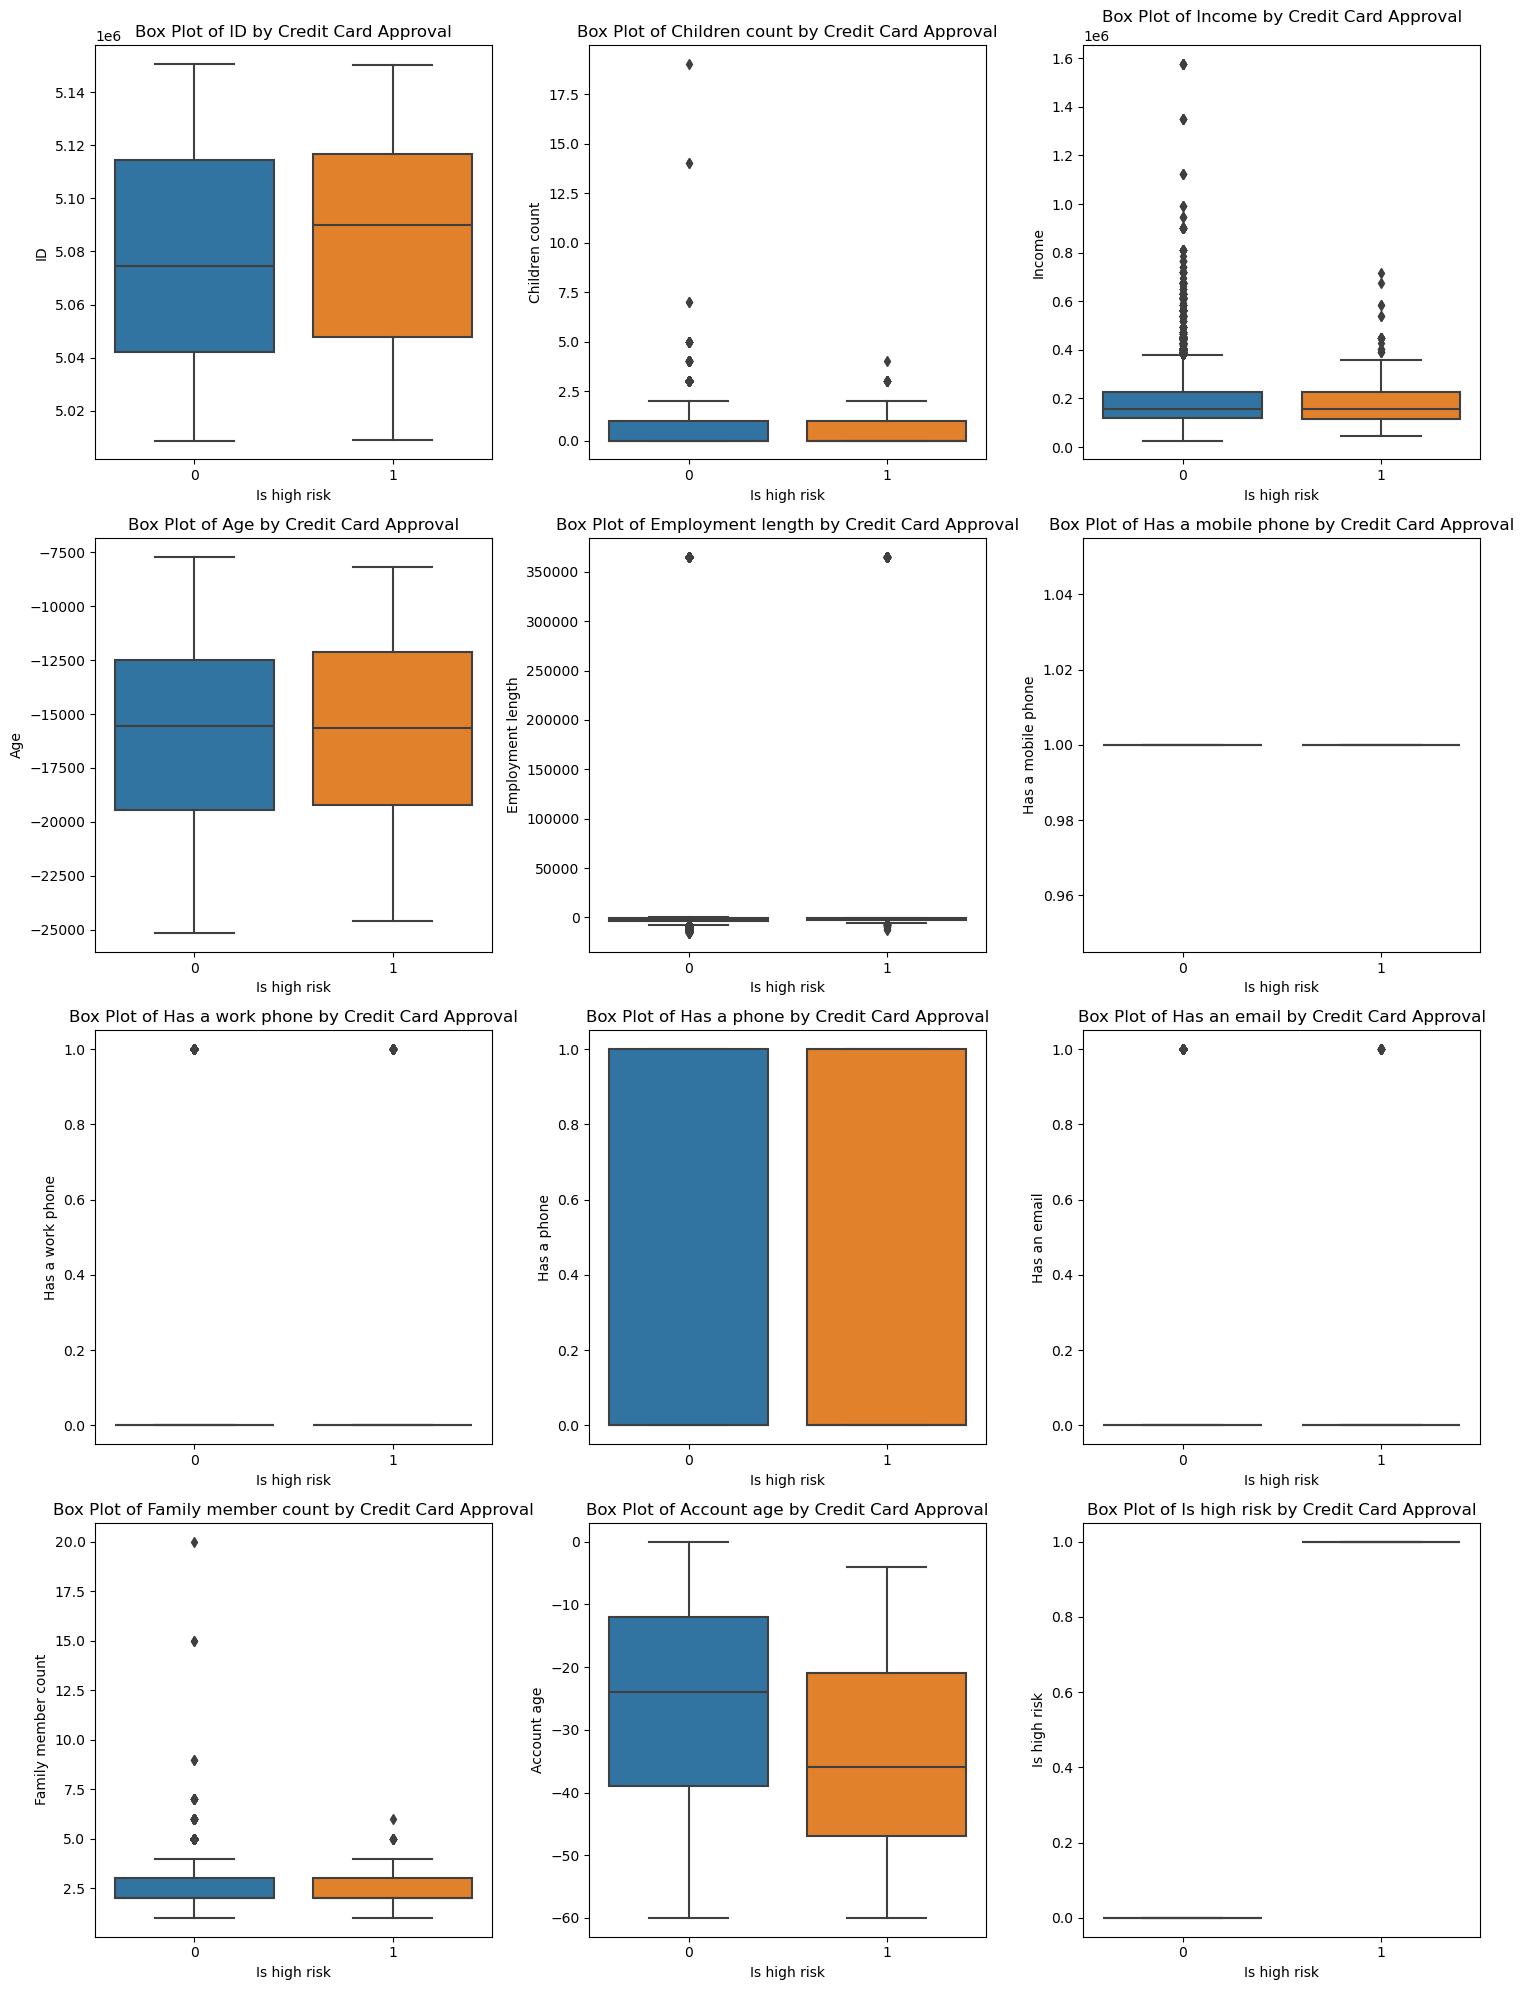

In [101]:
# Box plots for numerical features in the training dataset
num_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_features_train)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(num_features_train, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x='Is high risk', y=feature, data=train_data)
    plt.title(f'Box Plot of {feature} by Credit Card Approval')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

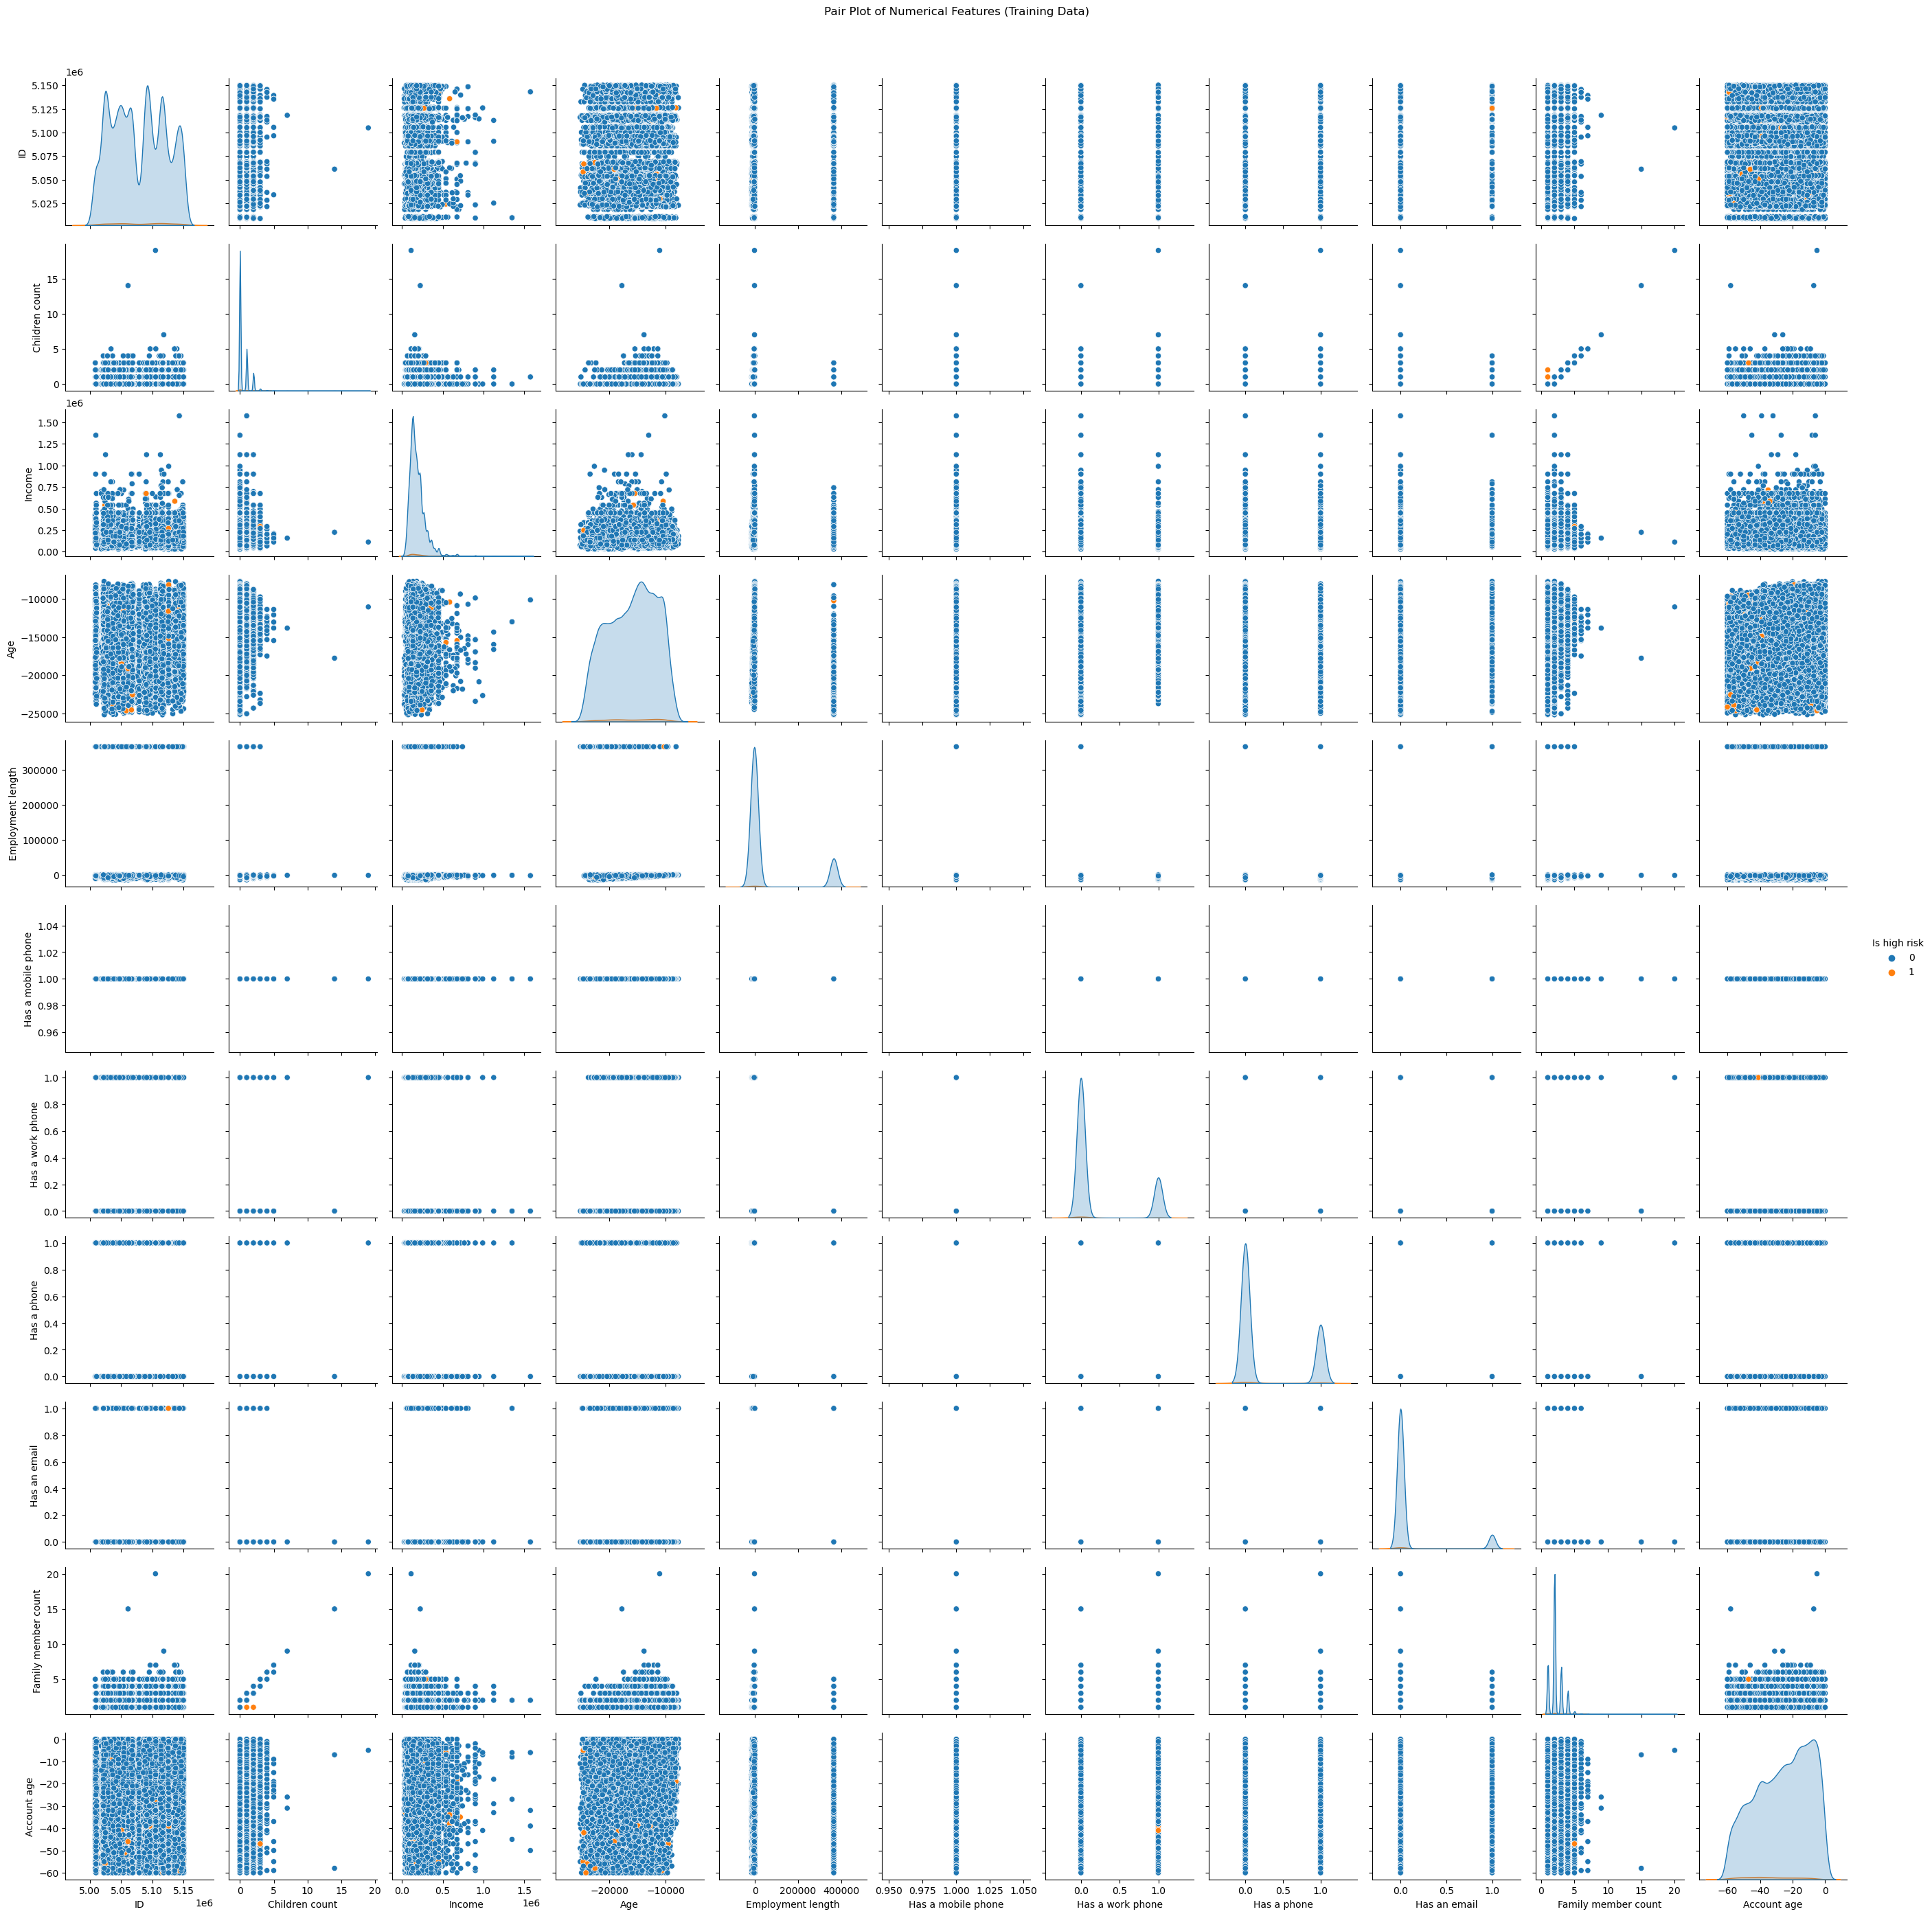

In [102]:
# Scatter plots for numerical features in the training dataset
sns.pairplot(train_data, hue='Is high risk')
plt.suptitle('Pair Plot of Numerical Features (Training Data)', y=1.02)
plt.show()

# 3. Univariate Analysis

In [103]:
# Define numerical and categorical features
num_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_features_train = train_data.select_dtypes(include=['object']).columns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

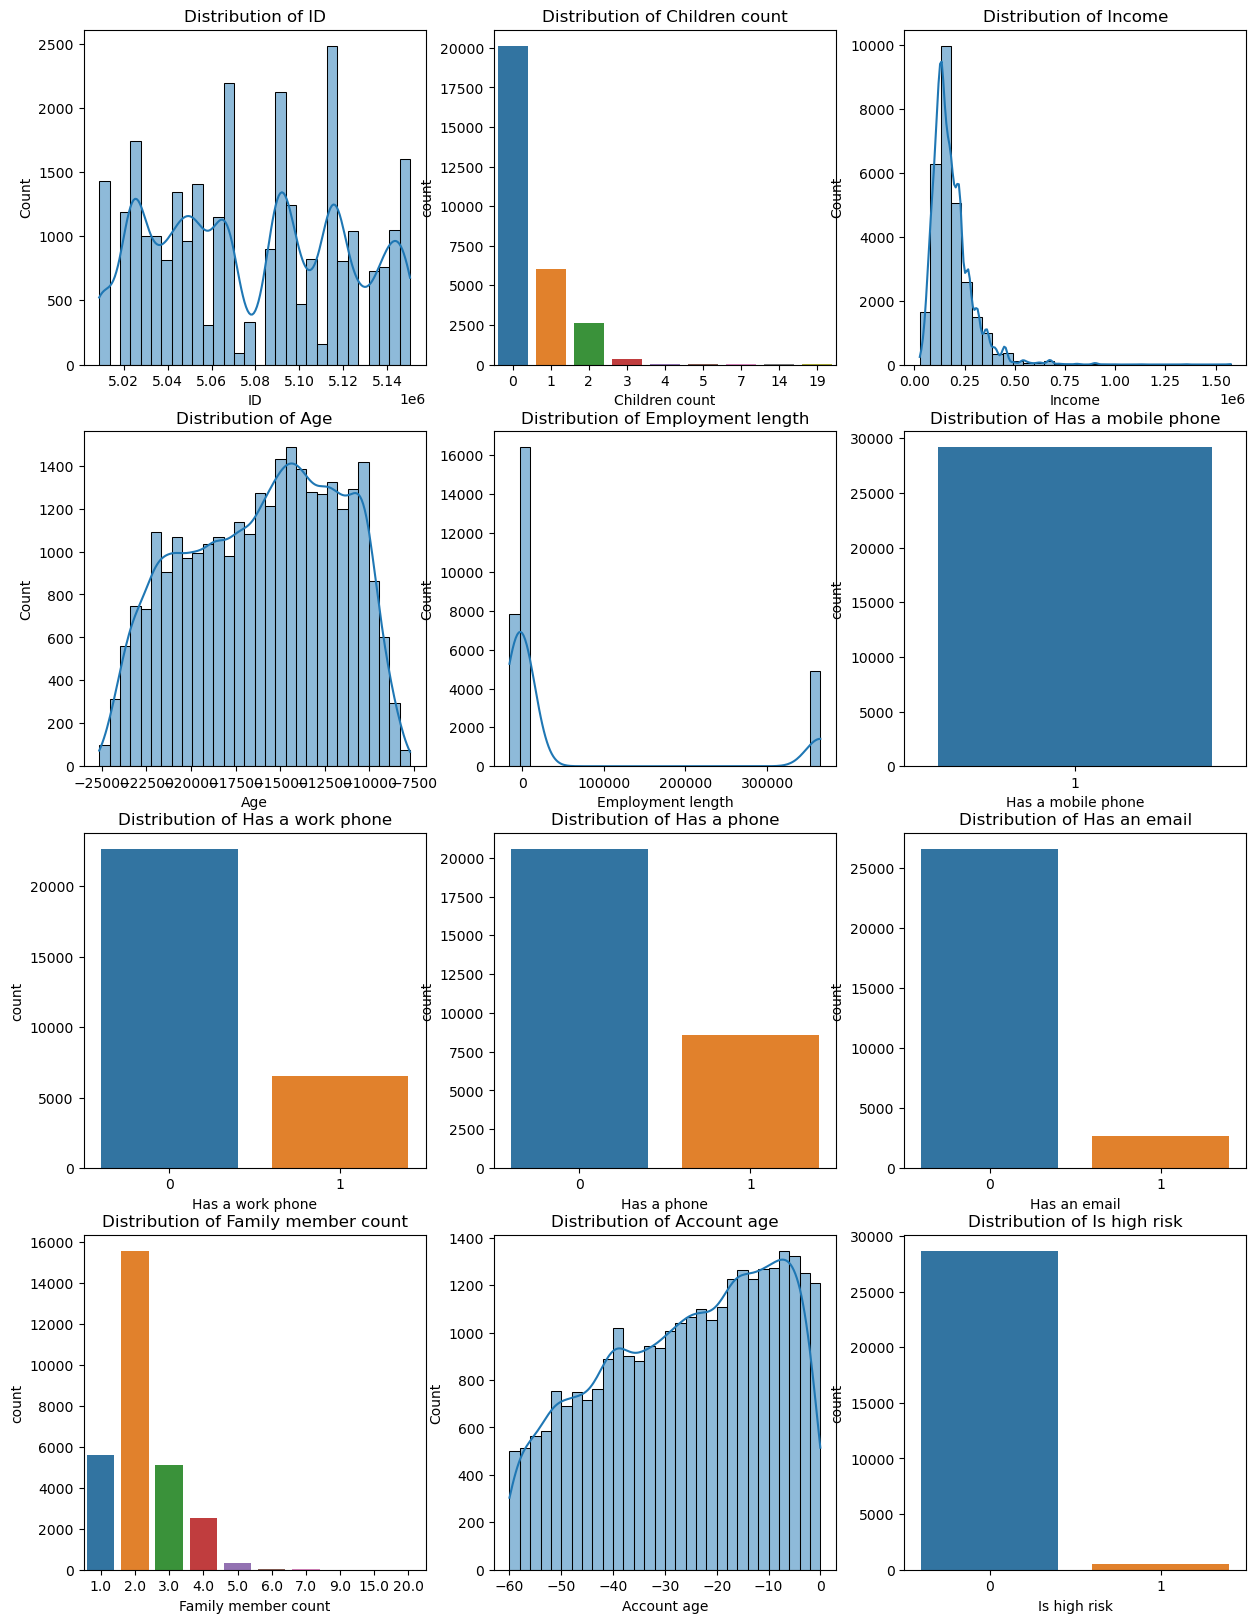

In [104]:
# Plotting numerical features
num_features_train = train_data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_features_train)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))
for i, feature in enumerate(num_features_train, 1):
    plt.subplot(num_rows, 3, i)
    if train_data[feature].nunique() > 10:
        sns.histplot(train_data[feature], bins=30, kde=True)
    else:
        sns.countplot(x=feature, data=train_data)
    plt.title(f'Distribution of {feature}')

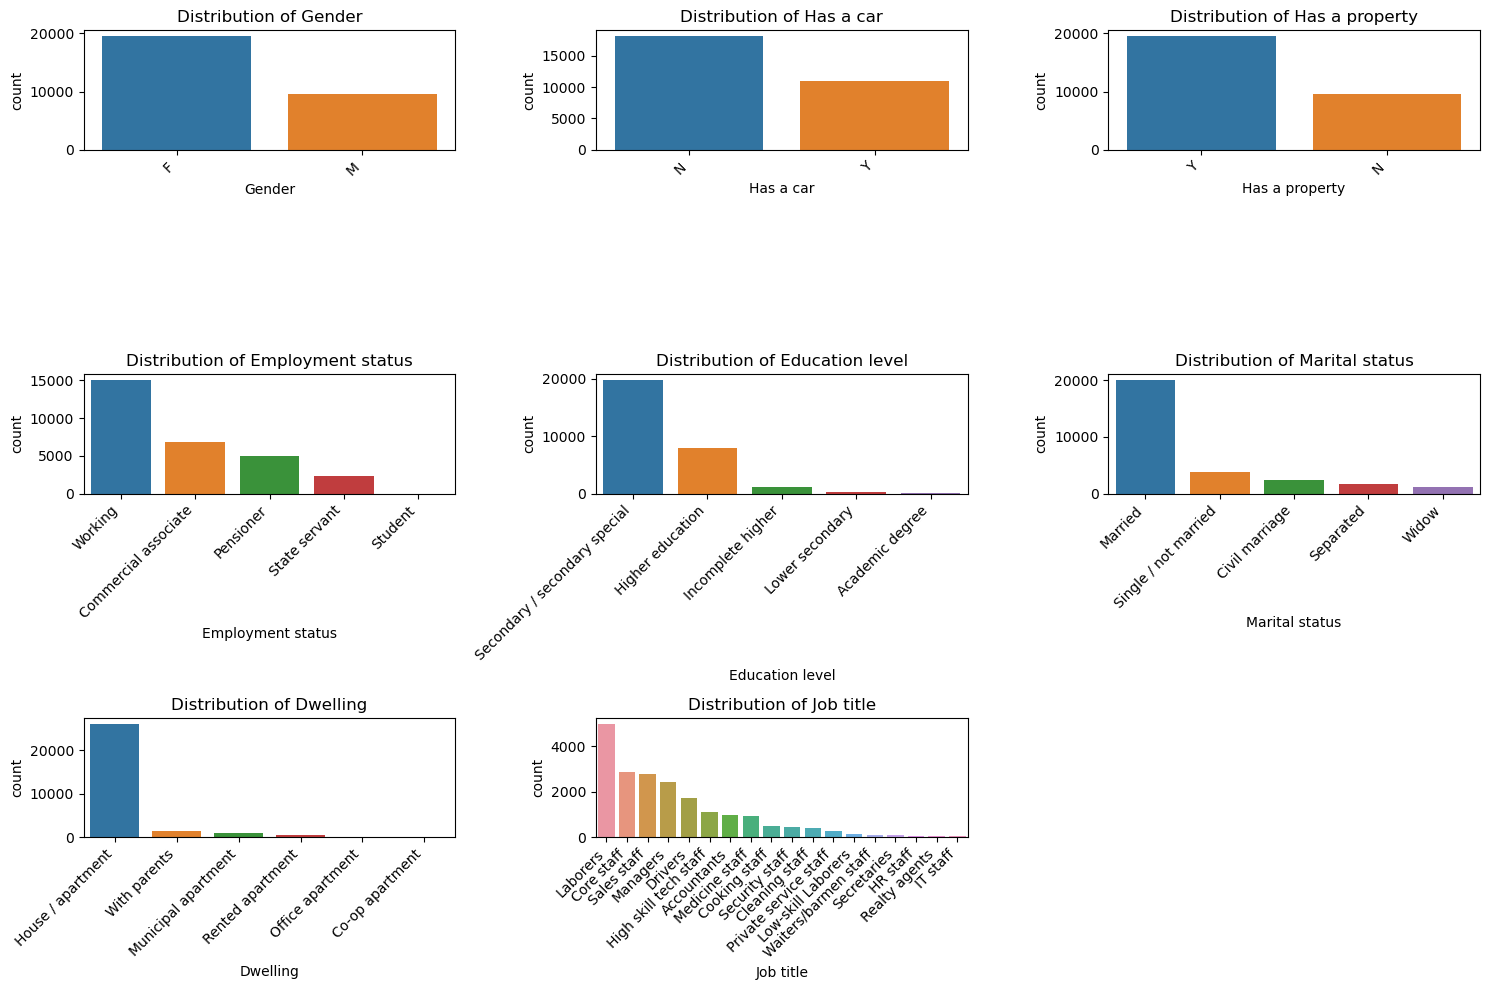

In [105]:
# Plotting categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features_train, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=train_data, order=train_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Bivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 1500x1000 with 0 Axes>

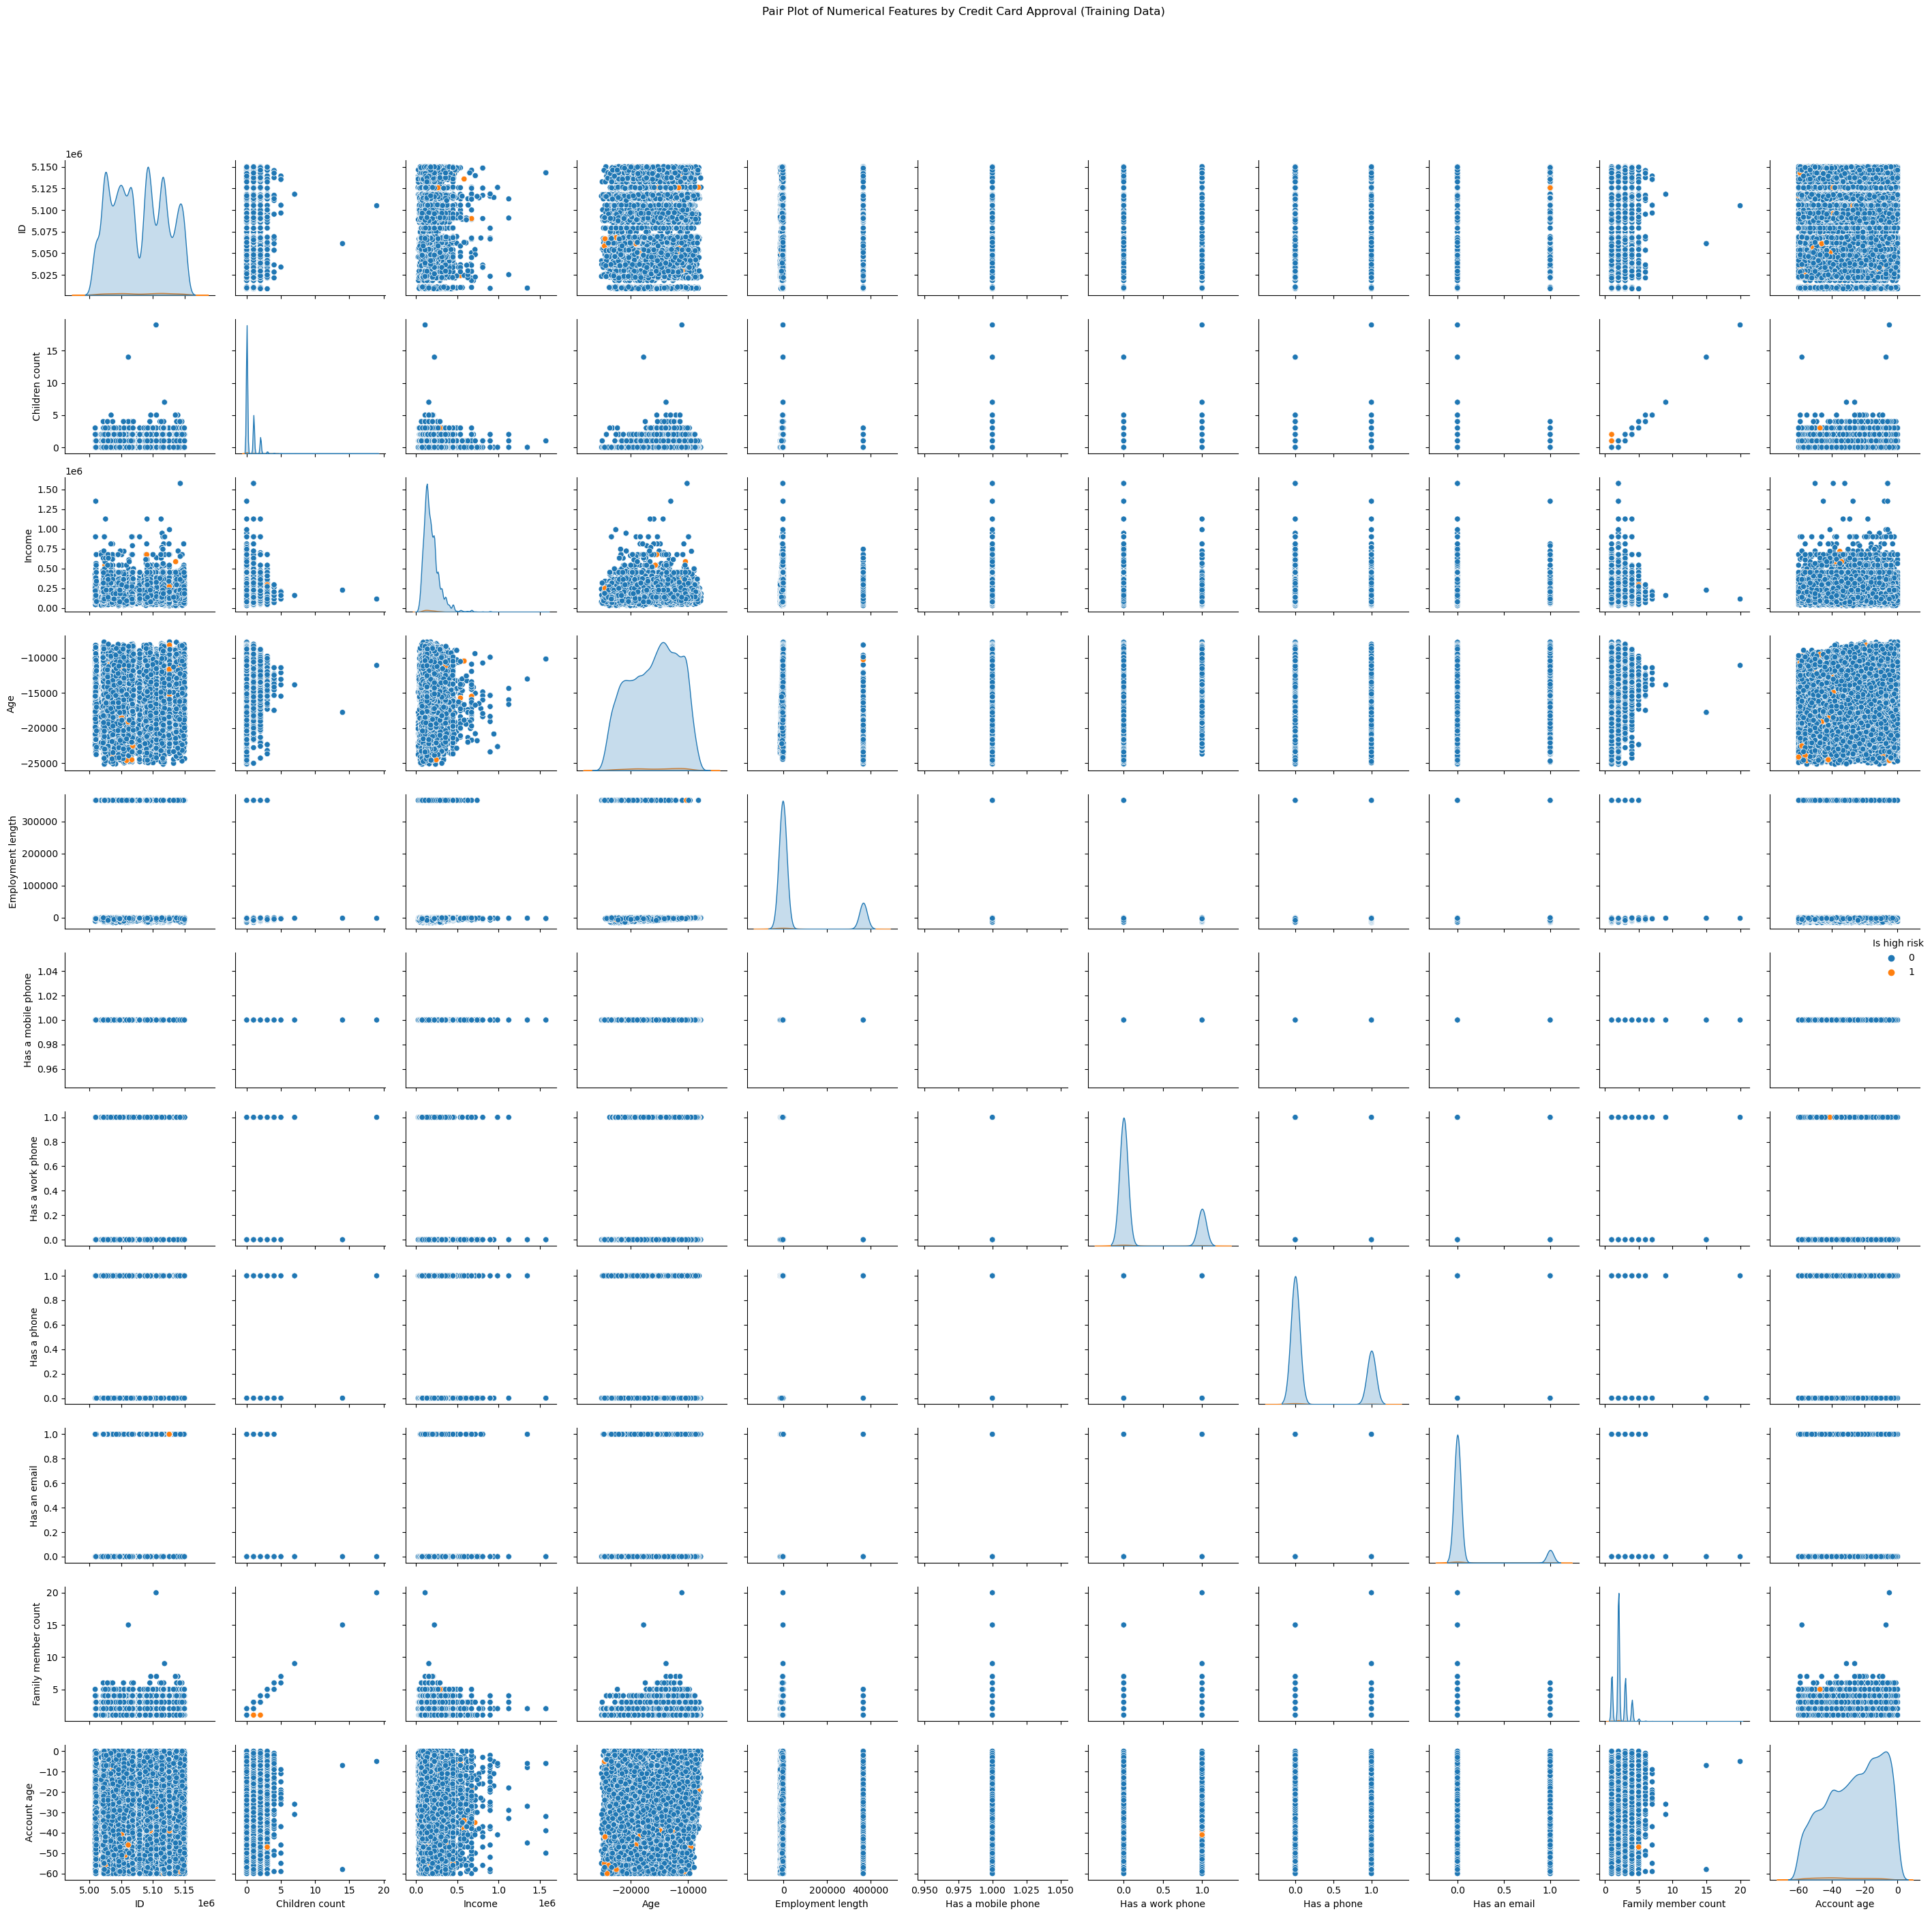

In [106]:
# Scatter plots for pairs of numerical features
plt.figure(figsize=(15, 10))
sns.pairplot(train_data, hue='Is high risk', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Credit Card Approval (Training Data)', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to leave space for the suptitle
plt.show()

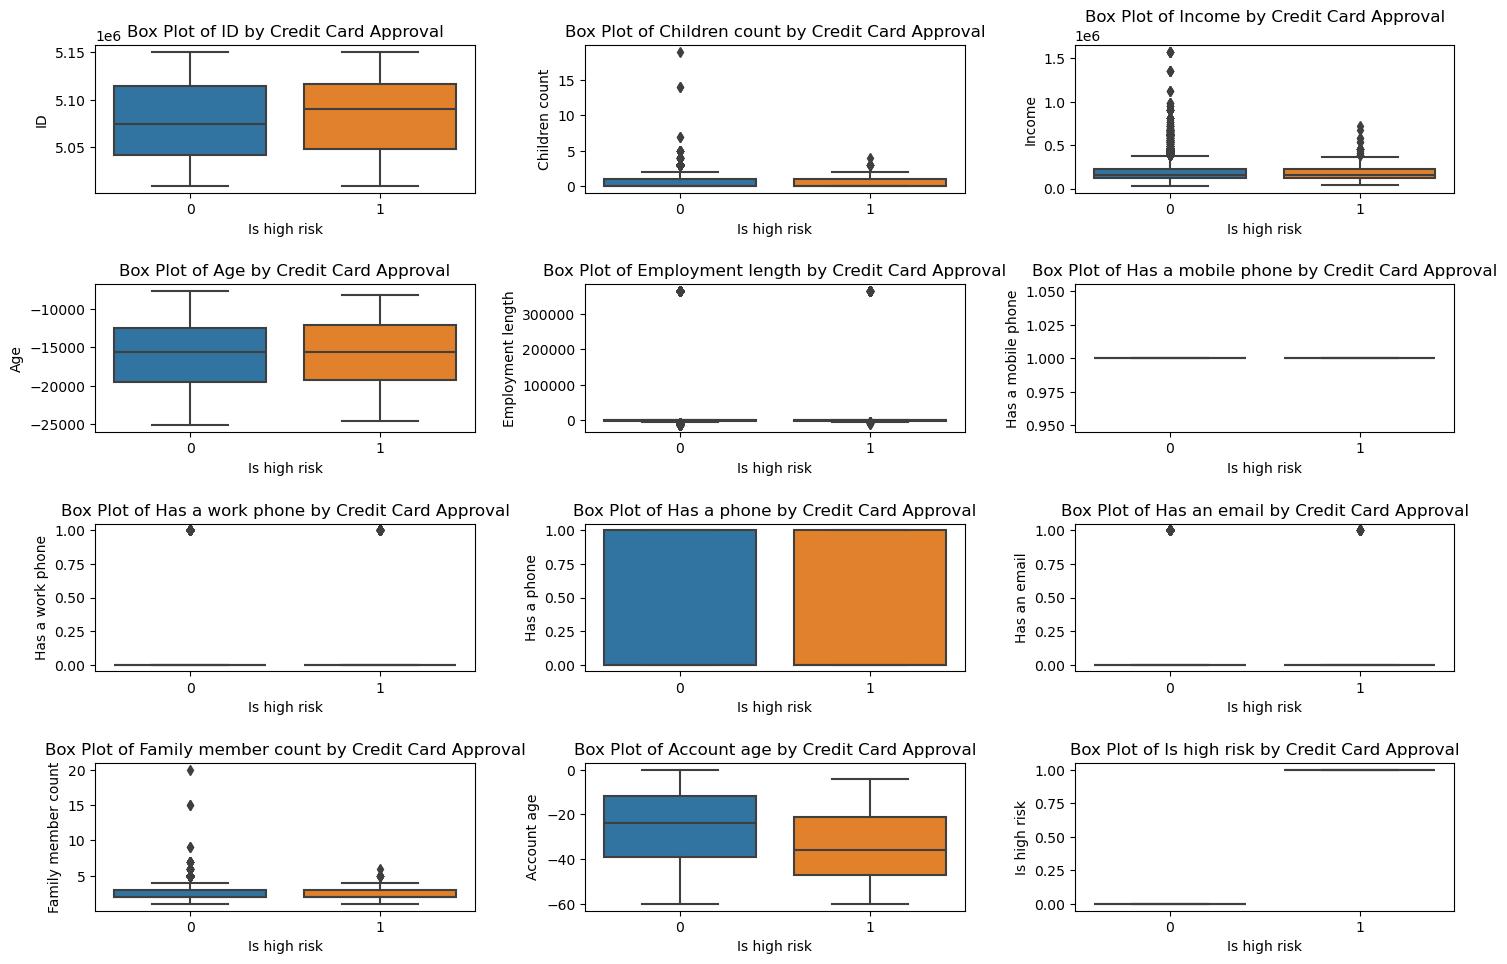

In [107]:
# Box plots for the relationship between numerical features and the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features_train, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x='Is high risk', y=feature, data=train_data)
    plt.title(f'Box Plot of {feature} by Credit Card Approval')

plt.tight_layout(pad=2)  # Increase the padding between subplots
plt.show()


# 5. Handling Missing Values

In [108]:
# Display the percentage of missing values for each column
missing_percentage = train_data.isnull().mean() * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 ID                      0.000000
Gender                  0.000000
Has a car               0.000000
Has a property          0.000000
Children count          0.000000
Income                  0.000000
Employment status       0.000000
Education level         0.000000
Marital status          0.000000
Dwelling                0.000000
Age                     0.000000
Employment length       0.000000
Has a mobile phone      0.000000
Has a work phone        0.000000
Has a phone             0.000000
Has an email            0.000000
Job title              30.951483
Family member count     0.000000
Account age             0.000000
Is high risk            0.000000
dtype: float64


In [109]:
# Handle missing values in 'Job title'
job_title_mode = train_data['Job title'].mode()[0]
train_data['Job title'].fillna(job_title_mode, inplace=True)


In [110]:
# Verify that missing values have been handled
print("Remaining Missing Values:\n", train_data.isnull().sum())

Remaining Missing Values:
 ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64



# 6. Feature Engineering

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
# Binning Numerical Features
bins = [0, 25, 35, 50, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels)

In [113]:
# Creating Interaction Terms
train_data['Income_Family'] = train_data['Income'] * train_data['Family member count']

In [114]:
# Label Encoding Categorical Features
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Job title']
for feature in categorical_features:
    train_data[feature+'_Encoded'] = label_encoder.fit_transform(train_data[feature])


In [115]:
# Display the updated dataset with new features
print("Updated Dataset with Engineered Features:\n", train_data.head())

Updated Dataset with Engineered Features:
         ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling  ...  Age_Group  Incom

# 7. Data Preprocessing


In [116]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [117]:
# Separate features and target variable
X = train_data.drop(columns=['Is high risk'])
y = train_data['Is high risk']

In [118]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [119]:
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', MinMaxScaler())  # Scale numerical features to a specific range
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])


In [120]:
# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [121]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

MACHINE LEARNING MODEL DEVELOPMENT

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [123]:
# Logistic Regression with increased max_iter
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', LogisticRegression(max_iter=1000))])  # Increase max_iter

# Fit the model with preprocessed data
logistic_model.fit(X_train, y_train)

# Perform predictions
predictions = logistic_model.predict(X_valid)

In [124]:
# Decision Tree
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Income_Family'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [125]:
# Random Forest
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestClassifier(random_state=42))])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Income_Family'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [126]:
# Gradient Boosting
gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', GradientBoostingClassifier(random_state=42))])
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Income_Family'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object'))])),
                ('model', GradientBoostingClassifier(random_state=42))])

Model Evaluation:

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [128]:
# Function for model evaluation
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, model.predict_proba(X)[:, 1])

    return accuracy, precision, recall, f1, confusion_mat, roc_auc

In [129]:
# Evaluate Logistic Regression
logistic_metrics = evaluate_model(logistic_model, X_valid, y_valid)

# Evaluate Decision Tree
dt_metrics = evaluate_model(dt_model, X_valid, y_valid)

# Evaluate Random Forest
rf_metrics = evaluate_model(rf_model, X_valid, y_valid)

# Evaluate Gradient Boosting
gb_metrics = evaluate_model(gb_model, X_valid, y_valid)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# Print the evaluation metrics for each model
print("Logistic Regression Metrics:", logistic_metrics)
print("Decision Tree Metrics:", dt_metrics)
print("Random Forest Metrics:", rf_metrics)
print("Gradient Boosting Metrics:", gb_metrics)

Logistic Regression Metrics: (0.9852563003600205, 0.0, 0.0, 0.0, array([[5747,    0],
       [  86,    0]], dtype=int64), 0.6580420118079807)
Decision Tree Metrics: (0.973255614606549, 0.16346153846153846, 0.19767441860465115, 0.1789473684210526, array([[5660,   87],
       [  69,   17]], dtype=int64), 0.5912680427806621)
Random Forest Metrics: (0.9831990399451397, 0.2692307692307692, 0.08139534883720931, 0.12500000000000003, array([[5728,   19],
       [  79,    7]], dtype=int64), 0.807991833959882)
Gradient Boosting Metrics: (0.9845705468883936, 0.3, 0.03488372093023256, 0.0625, array([[5740,    7],
       [  83,    3]], dtype=int64), 0.7399765701822184)


In [131]:
from sklearn.metrics import accuracy_score

In [132]:
# Assuming you have the true labels and predicted labels for each model
y_true_logistic = y_valid
y_pred_logistic = logistic_model.predict(X_valid)

y_true_dt = y_valid
y_pred_dt = dt_model.predict(X_valid)

y_true_rf = y_valid
y_pred_rf = rf_model.predict(X_valid)

y_true_gb = y_valid
y_pred_gb = gb_model.predict(X_valid)

In [133]:
# Calculate accuracy for each model
accuracy_logistic = accuracy_score(y_true_logistic, y_pred_logistic)
accuracy_dt = accuracy_score(y_true_dt, y_pred_dt)
accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
accuracy_gb = accuracy_score(y_true_gb, y_pred_gb)

In [134]:
# Print accuracy for each model
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)
print("Gradient Boosting Accuracy:", accuracy_gb)

Logistic Regression Accuracy: 0.9852563003600205
Decision Tree Accuracy: 0.973255614606549
Random Forest Accuracy: 0.9831990399451397
Gradient Boosting Accuracy: 0.9845705468883936


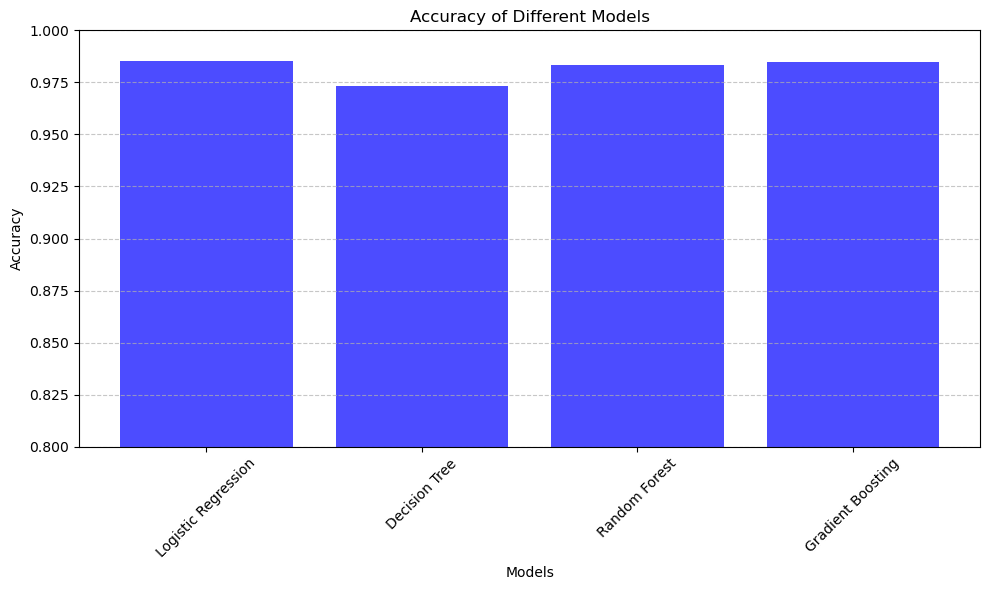

In [135]:
import matplotlib.pyplot as plt

# List of model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# List of accuracies
accuracies = [accuracy_logistic, accuracy_dt, accuracy_rf, accuracy_gb]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.8, 1)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TEST

In [136]:
test_data = pd.read_csv('test_data.csv')

In [137]:
# Add missing columns and fill missing values (if any)
missing_columns = set(train_data.columns) - set(test_data.columns)
for column in missing_columns:
    test_data[column] = 0  # Fill with zeros or use appropriate values based on your preprocessing


In [138]:
# Ensure the columns are in the same order
test_data = test_data[train_data.columns]

In [139]:

# Now you can proceed with making predictions
logistic_predictions_test = logistic_model.predict(test_data)
dt_predictions_test = dt_model.predict(test_data)
rf_predictions_test = rf_model.predict(test_data)
gb_predictions_test = gb_model.predict(test_data)

In [140]:
#true labels are in the 'Is high risk' column of the test_data DataFrame
true_labels = test_data['Is high risk']

In [141]:
# Logistic Regression
logistic_accuracy_test = accuracy_score(true_labels, logistic_predictions_test)
print(f'Logistic Regression Accuracy on Test Data: {logistic_accuracy_test}')

# Decision Tree
dt_accuracy_test = accuracy_score(true_labels, dt_predictions_test)
print(f'Decision Tree Accuracy on Test Data: {dt_accuracy_test}')

# Random Forest
rf_accuracy_test = accuracy_score(true_labels, rf_predictions_test)
print(f'Random Forest Accuracy on Test Data: {rf_accuracy_test}')

# Gradient Boosting
gb_accuracy_test = accuracy_score(true_labels, gb_predictions_test)
print(f'Gradient Boosting Accuracy on Test Data: {gb_accuracy_test}')

Logistic Regression Accuracy on Test Data: 0.9839550191991223
Decision Tree Accuracy on Test Data: 0.9334887547997806
Random Forest Accuracy on Test Data: 0.9835436094349973
Gradient Boosting Accuracy on Test Data: 0.9684585847504114


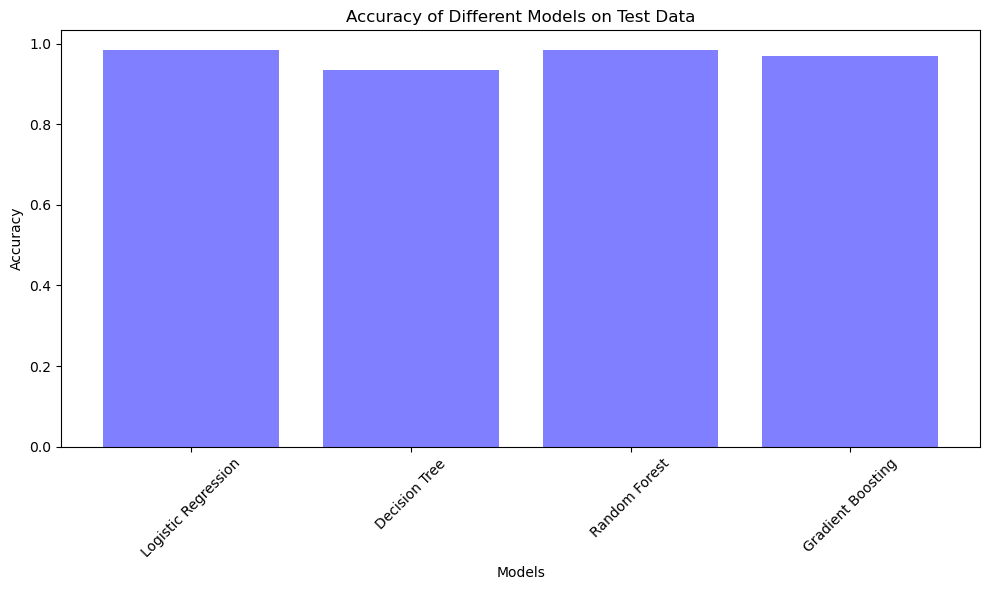

In [142]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracies_test = [logistic_accuracy_test, dt_accuracy_test, rf_accuracy_test, gb_accuracy_test]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_test, color='b', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Test Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
import pickle

In [ ]:
with open("Logistic_Regression_model.pkl","wb") as f:
    pickle.dump(clf,f)

We found out that Logistic Regression model is performing best on the train set as well as test set with 98.53% accuracy
We will be using Logistic Regression model to predict our values.